# <center> Обучение с учителем. Классификация
## <center> Мультиклассовая классификация на Python

Давайте посмотрим, как логистическая регрессия решает задачу мультиклассовой классификации. 

Возьмём датасет о пингвинах из библиотеки `seaborn`:

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики

import warnings # для игнорирования предупреждений
#Игнорируем варнинги
warnings.filterwarnings('ignore')


# Устанавливаем стиль визуализаций в matplotlib
%matplotlib inline

In [2]:
penguins_data = sns.load_dataset('penguins')
penguins_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Описание данных:

* species — класс пингвина ('Adelie', 'Chinstrap', 'Gentoo'), целевой признак;
* island — остров, на котором живёт пингвин ('Torgersen', 'Biscoe', 'Dream');
* bill_length_mm — длина клюва в миллиметрах;
* bill_depth_mm — толщина клюва в миллиметрах;
* flipper_length_mm — длина крыльев;
* body_mass_g — масса;
* sex — пол ('Male', 'Female').

Наша цель — предсказать класс пингвина.

Очевидно, что классификация является мультиклассовой, так как возможных значений три.

Для начала давайте посмотрим на пропуски в данных:

In [4]:
penguins_data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Итак, в некоторых столбцах есть пропуски.

Логистическая регрессия — модель, которая не умеет работать с пропусками. Чтобы не получить ошибку, необходимо произвести предварительную предобработку. Для простоты давайте удалим все строки, содержащие пропуски в данных:

In [6]:
penguins_data = penguins_data.dropna()

Теперь, когда пропусков в данных больше нет, разделим набор данных на матрицу наблюдений `X` и столбец с ответами `y`.

In [7]:
X = penguins_data.drop('species', axis=1)
y = penguins_data['species']
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male


Данные содержат строковые категориальные столбцы — island и sex. Логистическая регрессия не умеет работать со строковыми значениями. Необходимо произвести кодирование категориальных признаков. 

> **Примечание**. Кодировать целевую переменную `y` не нужно, даже если она представлена в виде строковых значений. Это не влияет на работу модели.

Воспользуемся функцией `get_dummies()` из библиотеки `pandas` для «горячего» кодирования.

In [32]:
X_dummies = pd.get_dummies(X).astype(float)
X_dummies.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,0.0,0.0,1.0,0.0,1.0
1,39.5,17.4,186.0,3800.0,0.0,0.0,1.0,1.0,0.0
2,40.3,18.0,195.0,3250.0,0.0,0.0,1.0,1.0,0.0
4,36.7,19.3,193.0,3450.0,0.0,0.0,1.0,1.0,0.0
5,39.3,20.6,190.0,3650.0,0.0,0.0,1.0,0.0,1.0


Теперь данные готовы для подачи в модель.

Создаём модель логистической регрессии, значение параметра `multi_class` выставляем на `'multinomial'` (мультиклассовая классификация), `max_iter` — на 1000 (для обеспечения сходимости), `random_state=42`.

Затем обучим модель с помощью метода `fit()` и сделаем предсказание вероятностей принадлежности к каждому из классов с помощью метода `predict_proba()` и самих классов — с помощью метода `predict()`. Вероятности округлим до второго знака после запятой.

In [23]:
#Создаём объект класса LogisticRegression 
log_reg = linear_model.LogisticRegression(
    multi_class='multinomial', #мультиклассовая классификация
    max_iter=1000, #количество итераций, выделенных на сходимость
    random_state=42 #генерация случайных чисел
)
#Обучаем модель 
log_reg.fit(X_dummies, y)
#Делаем предсказание вероятностей
y_pred_proba = np.round(log_reg.predict_proba(X_dummies), 2)
#Делаем предсказание класса
y_pred = log_reg.predict(X_dummies)

Для наглядности создадим таблицу из вероятностей для каждого класса и финального предсказания. Выберем пять случайных строк из этой таблицы с помощью метода [sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html):

In [22]:
#Создаём DataFrame из вероятностей
y_pred_proba_df = pd.DataFrame(
    y_pred_proba, 
    columns=['Adelie', 'Chinstrap', 'Gentoo']
)
#Создаём DataFrame из предсказанных классов
y_pred_df = pd.DataFrame(
    y_pred, 
    columns=['Predicted Class']
)
#Объединяем таблицы по вертикальной оси
y_df = pd.concat([y_pred_proba_df, y_pred_df], axis=1)
#Выбираем пять случайных строк
y_df.sample(10, random_state=2)

,Adelie,Chinstrap,Gentoo,Predicted Class
277,0.00,0.00,1.0,Gentoo
223,0.00,0.00,1.0,Gentoo
7,0.78,0.22,0.0,Adelie
160,0.00,1.00,0.0,Chinstrap
65,1.00,0.00,0.0,Adelie
142,1.00,0.00,0.0,Adelie
153,0.00,1.00,0.0,Chinstrap
66,1.00,0.00,0.0,Adelie
144,1.00,0.00,0.0,Adelie
89,1.00,0.00,0.0,Adelie


Из таблицы можно проследить, как происходит предсказание класса пингвина на основе полученных вероятностей. Видно, что выбирается класс, вероятность принадлежности к которому максимальна.

Например, для строки под номером 7 логистическая регрессия предсказала три вероятности: 0.79 — вероятность принадлежности к классу Adelie, 0.21 — к классу Chinstrap и 0 — к классу Gentoo. На основе этих вероятностей было сделано предсказание и модель отнесла пингвина в строке 7 к классу Adelie.

Вот так и происходит мультиклассовая классификация. 

Давайте посмотрим, как в таком случае будет выглядеть отчёт о метриках:

In [11]:
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       146
   Chinstrap       1.00      1.00      1.00        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333



Для мультиклассовой классификации к отчёту просто добавляется новая строка, соответствующая третьему классу. 

Из отчёта видно, что наша модель идеально решила задачу классификации (все метрики равны 1), то есть классы оказались линейно разделимыми.

<Axes: >

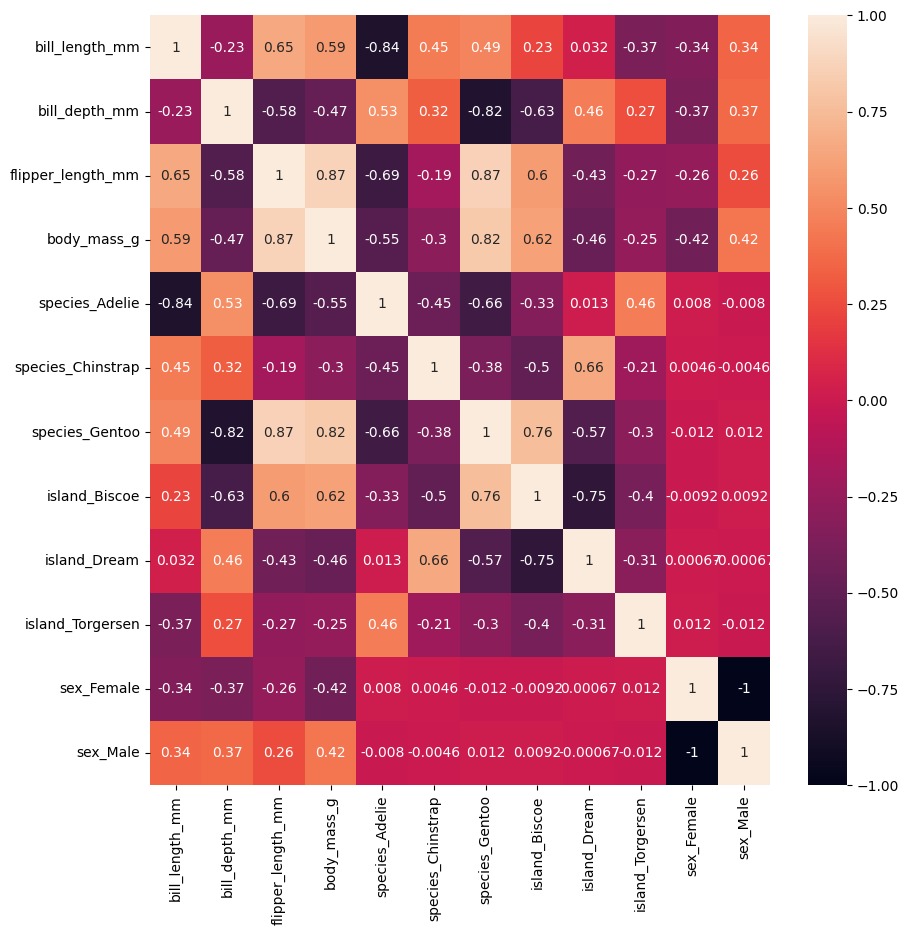

In [37]:
p_data = pd.get_dummies(penguins_data).astype(float)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 10))
sns.heatmap(p_data.corr(numeric_only=True), annot=True)